# Iris

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [3]:
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

In [4]:
print(X_train.shape)
print(X_test.shape)

(75, 4)
(75, 4)


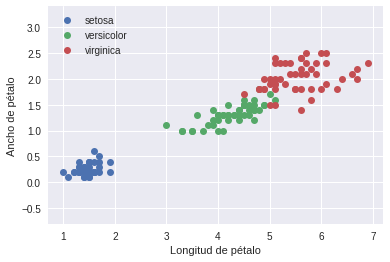

In [5]:
# Visualize the data sets
# plt.figure(figsize=(16, 6))
# plt.subplot(1, 2, 1)
# for target, target_name in enumerate(names):
#    X_plot = X[y == target]
#    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
#plt.xlabel(feature_names[0])
#plt.ylabel(feature_names[1])
#plt.axis('equal')
#plt.legend();

#plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel('Longitud de pétalo')#feature_names[2])
plt.ylabel('Ancho de pétalo') #feature_names[3])
plt.axis('equal')
plt.legend()
plt.savefig('iris.eps');

In [16]:
print(X_train[0][2:4],Y_train[0])

[0.25122143 0.3957741 ] [0. 1. 0.]


In [6]:
def hebb(w1,w2,w3,Xp,yp,s):
	for i in range(len(yp)):
		if yp[i][0] == 1:
			w1[-int(Xp[i][3]*s)+12][int(Xp[i][2]*s)+12] += alpha			
		elif yp[i][1] == 1:
			w2[-int(Xp[i][3]*s)+12][int(Xp[i][2]*s)+12] += alpha
		else:
			w3[-int(Xp[i][3]*s)+12][int(Xp[i][2]*s)+12] += alpha      


	return w1,w2,w3

In [7]:
s = 500
alpha = 0.1

W1 = np.zeros((s*24,s*24))
W2 = np.zeros((s*24,s*24))
W3 = np.zeros((s*24,s*24))

W1,W2,W3 = hebb(W1,W2,W3,X_train,Y_train,s)

In [9]:
# Evaluacion

def eval(Xp,Yp):

  N = len(Yp)

  suma = 0
  for i in range(N):
    a = W1[-int(Xp[i][3]*s)+12][int(Xp[i][2]*s)+12]
    b = W2[-int(Xp[i][3]*s)+12][int(Xp[i][2]*s)+12]
    c = W3[-int(Xp[i][3]*s)+12][int(Xp[i][2]*s)+12]

    if Yp[i][0] == 1:
      if a != max([a,b,c]):
        suma += 1
    elif Yp[i][1] == 1:
      if b != max([a,b,c]):
        suma += 1
    elif Yp[i][2] == 1:
      if c != max([a,b,c]):
        suma += 1



  print("Metodo hebbiano")
  print("costo=",suma)
  print("Efectividad =",1-float(suma)/(N))

eval(X_train,Y_train)
eval(X_test,Y_test)

Metodo hebbiano
costo= 0
Efectividad = 1.0
Metodo hebbiano
costo= 0
Efectividad = 1.0


In [49]:
print(N)

75


In [77]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras.layers import Dense

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model



models = [create_custom_model(n_features, n_classes, 50, i, 'model_{}'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1581 (Dense)           (None, 50)                250       
_________________________________________________________________
dense_1582 (Dense)           (None, 3)                 153       
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1583 (Dense)           (None, 50)                250       
_________________________________________________________________
dense_1584 (Dense)           (None, 50)                2550      
_________________________________________________________________
dense_1585 (Dense)           (None, 3)                 153       
Total params: 2,953
Trainable params: 2,953


In [78]:
from keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]

Model name: model_1
Test loss: 0.19472108781337738
Test accuracy: 0.9200000166893005
Model name: model_2
Test loss: 0.33980661630630493
Test accuracy: 0.9200000166893005
Model name: model_3
Test loss: 0.6806798577308655
Test accuracy: 0.9066666960716248


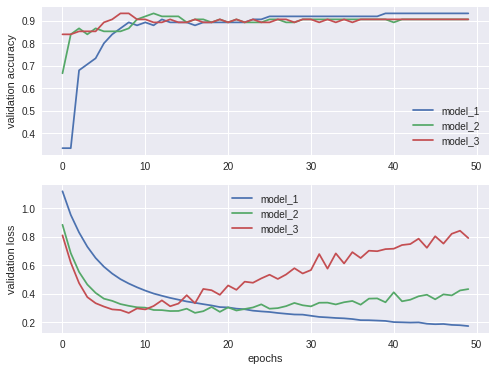

In [56]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_accurady = history_dict[model_name][0].history['val_accuracy']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_accurady, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend();

In [89]:
import random
import time
import keras

# Constants
mum = 9
M1 = 4
T1 = 3
k1 = 10




In [90]:
def geneticCode(V):
        model = Sequential()
        for v in V:
            model.add(Dense(v, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])

        model.fit(X_train, Y_train, epochs=25)


        validation_loss, validation_acc = model.evaluate(X_train, Y_train)

        print('Validation accuracy:', validation_acc)

        return validation_acc

def geneticCodeE(V):
        model = Sequential()
        for v in V:
            model.add(Dense(v, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])

        model.fit(X_train, Y_train, epochs=25)

        validation_loss, validation_acc = model.evaluate(X_test, Y_test)

        print('Validation accuracy:', validation_acc)

        return validation_acc


In [91]:
V = [10]

Nset = [V]

input_dim, output_dim = n_features, n_classes

ma = geneticCodeE(V)

maxis = [ma]

# Fision binaria

NsetAux = [V]
maxisAux= [ma]

L = []
MAXIS = []

r = False

Epoch 1/25
3/3 [==============================] - 0s 4ms/step - loss: 1.3770 - accuracy: 0.2800
Epoch 2/25
3/3 [==============================] - 0s 4ms/step - loss: 1.3538 - accuracy: 0.2800
Epoch 3/25
3/3 [==============================] - 0s 3ms/step - loss: 1.3326 - accuracy: 0.2800
Epoch 4/25
3/3 [==============================] - 0s 4ms/step - loss: 1.3104 - accuracy: 0.2800
Epoch 5/25
3/3 [==============================] - 0s 4ms/step - loss: 1.2889 - accuracy: 0.2800
Epoch 6/25
3/3 [==============================] - 0s 4ms/step - loss: 1.2686 - accuracy: 0.2800
Epoch 7/25
3/3 [==============================] - 0s 5ms/step - loss: 1.2478 - accuracy: 0.2933
Epoch 8/25
3/3 [==============================] - 0s 4ms/step - loss: 1.2283 - accuracy: 0.2933
Epoch 9/25
3/3 [==============================] - 0s 7ms/step - loss: 1.2089 - accuracy: 0.2933
Epoch 10/25
3/3 [==============================] - 0s 4ms/step - loss: 1.1910 - accuracy: 0.2933
Epoch 11/25
3/3 [======================

In [92]:
timeA = time.time()

for t in range(15): #15

        # Fision binaria

        print("__________________")

        # Depredacion
        l = len(Nset)
        #if l > 5: # PARAMETRO 5

        if t == M1:
                print("Depredacion")
                r = True
                maxiscopy = maxis[:]
                maxiscopy.sort(reverse=True)
                #maxiscopy = np.array(maxiscopy) + 0.0001*np.random.rand(len(maxiscopy))
                print(maxiscopy)
                print(mum) # PAREMETRO 2
                theta = maxiscopy[mum] # VERIFICAR
                print("theta=",theta)
                Nset2 = Nset[:]
                maxis2= maxis[:]
                h = 0
                for i in range(l):
                        if maxis[i] <= theta:
                                print(maxis[i])
                                print(maxis2[i-h])
                                del Nset2[i-h]
                                del maxis2[i-h]
                                h += 1
                Nset = Nset2[:]
                maxis= maxis2[:]
                NsetAux = Nset2[:]
                maxisAux = maxis2[:]
                l = len(Nset)
                L.append(l)

        print("__")
        print(Nset)
        print(maxis)
        for N in Nset: # Reproduccion
                #NsetAux.append(N)
                N1 = N[:]
                alea = random.random()
                if alea < 0.7: # Desicion alpha/beta
                        #alpha-mutacion
                        l = len(N)
                        elec = random.randrange(l)
                        N1[elec] += k1
                else:
                        N1.append(k1)

                # N1 es el hijo. N se divide en N y N1
                #NsetAux.append(N1)

                ban = True
                for i in range(len(NsetAux)): #NsetAux
                        if NsetAux[i] == N1:
                                ban = False
                                #print(NsetAux)
                                #print(maxisAux)
                                m1 = maxisAux[i]

                NsetAux.append(N1)

                if ban:
                        m1 = geneticCode(N1)
                maxisAux.append(m1)
        Nset  = NsetAux[:]
        maxis = maxisAux[:]
        maxis = np.array(maxis) + 0.0001*np.random.rand(len(maxis))
        maxis = list(maxis)
        print("Redes")
        print(Nset)
        print("Maximos")
        print(maxis)
        print
        print
        maxisAux = maxis[:]

        l = len(Nset)
        L.append(l)
        MAXIS.append(max(maxis))

        if r:
                M1 += T1
                r = False

timeB = time.time()

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Epoch 1/25
3/3 [==============================] - 0s 6ms/step - loss: 1.1156 - accuracy: 0.3333
Epoch 2/25
3/3 [==============================] - 0s 5ms/step - loss: 1.0835 - accuracy: 0.3600
Epoch 3/25
3/3 [==============================] - 0s 7ms/step - loss: 1.0538 - accuracy: 0.3867
Epoch 4/25
3/3 [==============================] - 0s 5ms/step - loss: 1.0248 - accuracy: 0.3867
Epoch 5/25
3/3 [==============================] - 0s 5ms/step - loss: 0.9964 - accuracy: 0.4267
Epoch 6/25
3/3 [==============================] - 0s 6ms/step - loss: 0.9695 - accuracy: 0.4533
Epoch 7/25
3/3 [==============================] - 0s 5ms/step - loss: 0.9429 - accuracy: 0.5067
Epoch 8/25
3/3 [==============================] - 0s 4ms/step - loss: 0.9167 - accuracy: 0.5600
Epoch 9/25
3/3 [==============================] - 0s 5ms/step - loss: 0.8915 - accuracy: 0.5867
Epoch 10/25
3/3 [==============================] - 0s 5ms/step - loss

In [97]:
for i in range(len(maxis)):
  if maxis[i] > 0.96:
    print(i,maxis[i],Nset[i])

16 0.9601244531671257 [80, 40, 10]
31 0.9600907522580306 [70, 30, 10, 10]


In [100]:
V = [70, 30, 10, 10]

geneticCodeE(V)

Epoch 1/25
3/3 [==============================] - 0s 7ms/step - loss: 1.0402 - accuracy: 0.4800
Epoch 2/25
3/3 [==============================] - 0s 4ms/step - loss: 1.0129 - accuracy: 0.6133
Epoch 3/25
3/3 [==============================] - 0s 4ms/step - loss: 0.9875 - accuracy: 0.6400
Epoch 4/25
3/3 [==============================] - 0s 3ms/step - loss: 0.9643 - accuracy: 0.6533
Epoch 5/25
3/3 [==============================] - 0s 12ms/step - loss: 0.9378 - accuracy: 0.6667
Epoch 6/25
3/3 [==============================] - 0s 5ms/step - loss: 0.9071 - accuracy: 0.6667
Epoch 7/25
3/3 [==============================] - 0s 5ms/step - loss: 0.8739 - accuracy: 0.6800
Epoch 8/25
3/3 [==============================] - 0s 4ms/step - loss: 0.8381 - accuracy: 0.6933
Epoch 9/25
3/3 [==============================] - 0s 3ms/step - loss: 0.8039 - accuracy: 0.7067
Epoch 10/25
3/3 [==============================] - 0s 5ms/step - loss: 0.7700 - accuracy: 0.7067
Epoch 11/25
3/3 [=====================

0.9466666579246521

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


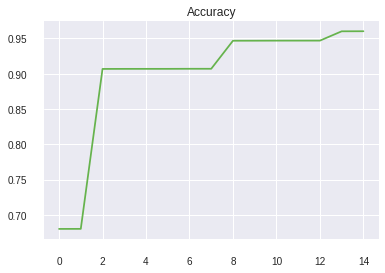

In [104]:
fig,ax = plt.subplots()

ax.plot(MAXIS, color = (0.4,0.7,0.3))
ax.set_title(u"Accuracy")
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
#ax.set_ylim([0,100])
ax.legend(framealpha=1)
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend()#loc="upper left", bbox_to_anchor=(0.8,0.2))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.legend()
plt.savefig('accuracies.png');
#plt.plot(MAXIS)
#plt.show()